#### Path similarity

I. Towards writing clear instructions

1. Towards a concise and detailed query.

First prompt (simple) in English and Darija. Input is in Darija.


In [1]:
from openai import OpenAI
import pandas as pd
df = pd.read_csv('verbs.csv')

client = OpenAI()

def p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "ترجم الفعل المعطي بالدارجة المغربية لنجليزية."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "Translate the provided Moroccan Darija dialect verb into English."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
                ],
        temperature=0
    )
    return completion.choices[0].message.content

def p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
messages = [
            {"role": "system", 
             "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لنجليزية." +
                "الترجمة خصها تكون فعل مجرد المصدر بلا تفسيرات."
             },
            {"role": "user", 
             "content": f"{verb}"
             },
],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", 
             "content": 
                "Translate the provided Moroccan Darija dialect verb into English." + 
                "The translation must be a bare-infinitive verb without explanations."
            },
            {"role": "user", 
             "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
messages = [
            {"role": "system", "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر." +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."
             },
            {"role": "user", "content": f"{verb}"},
],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": 
                "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb. " + 
                "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def p4_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر." +
                " تبع هاد الشروط ونتا كترجم: " +
                "1- متعطيش تفسيرات، غير الترجمة صافي. 2- الترجمة خص يكون فيها غير جذر الفعل المترجم"
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p4_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
            "role": "system",
            "content": "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb." + 
             " Please fulfill the following conditions when translating:"+
             " 1- Do not give explanations in the output, only the translation. 2- The translation must contain only the lemma of the translated verb."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
                ],
        temperature=0
    )
    return completion.choices[0].message.content

In [2]:

dataset = df.copy()
columns_to_delete = ['n1','n2', 'n3', 'n4', 'n5', 'n6']
dataset.drop(columns=columns_to_delete, inplace=True)

dataset['p1_transl'] = dataset['darija_ar'].apply(p1_translate_)
dataset['eng_p1_transl'] = dataset['darija_ar'].apply(eng_p1_translate_)
dataset['p2_transl'] = dataset['darija_ar'].apply(p2_translate_)
dataset['eng_p2_transl'] = dataset['darija_ar'].apply(eng_p2_translate_)
dataset['p3_transl'] = dataset['darija_ar'].apply(p3_translate_)
dataset['eng_p3_transl'] = dataset['darija_ar'].apply(eng_p3_translate_)
dataset['p4_transl'] = dataset['darija_ar'].apply(p4_translate_)
dataset['eng_p4_transl'] = dataset['darija_ar'].apply(eng_p4_translate_)

In [3]:
dataset.to_csv('verbs1.csv', index=False)

In [20]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
import pandas as pd
dataset = pd.read_csv('verbs1.csv')


eng = dataset['eng']
p1_transl = dataset['p1_transl']
eng_p1_transl = dataset['eng_p1_transl']
p2_transl = dataset['p2_transl']
eng_p2_transl = dataset['eng_p2_transl']
p3_transl = dataset['p3_transl']
eng_p3_transl = dataset['eng_p3_transl']
p4_transl = dataset['p4_transl']
eng_p4_transl = dataset['eng_p4_transl']


p1_transl = [verb.replace(" ", "_") for verb in p1_transl]
eng_p1_transl = [verb.replace(" ", "_") for verb in eng_p1_transl]
p2_transl = [verb.replace(" ", "_") for verb in p2_transl]
eng_p2_transl = [verb.replace(" ", "_") for verb in eng_p2_transl]
p3_transl = [verb.replace(" ", "_") for verb in p3_transl]
eng_p3_transl = [verb.replace(" ", "_") for verb in eng_p3_transl]
p4_transl = [verb.replace(" ", "_") for verb in p4_transl]
eng_p4_transl = [verb.replace(" ", "_") for verb in eng_p4_transl]

eng = [verb.replace(" ", "_") for verb in eng]


def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(transl,threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results

results_p1 = evaluate_pairs(p1_transl)
results_eng_p1 = evaluate_pairs(eng_p1_transl)
results_p2 = evaluate_pairs(p2_transl)
results_eng_p2 = evaluate_pairs(eng_p2_transl)
results_p3 = evaluate_pairs(p3_transl)
results_eng_p3 = evaluate_pairs(eng_p3_transl)
results_p4 = evaluate_pairs(p4_transl)
results_eng_p4 = evaluate_pairs(eng_p4_transl)

dataset['similarity_p1'] = [item[2] for item in results_p1]
dataset['similarity_eng_p1'] = [item[2] for item in results_eng_p1]
dataset['similarity_p2'] = [item[2] for item in results_p2]
dataset['similarity_eng_p2'] = [item[2] for item in results_eng_p2]
dataset['similarity_p3'] = [item[2] for item in results_p3]
dataset['similarity_eng_p3'] = [item[2] for item in results_eng_p3]
dataset['similarity_p4'] = [item[2] for item in results_p4]
dataset['similarity_eng_p4'] = [item[2] for item in results_eng_p4]

p1_s = dataset['similarity_p1']
ep1_s = dataset['similarity_eng_p1']
p2_s = dataset['similarity_p2'] 
ep2_s = dataset['similarity_eng_p2'] 
p3_s = dataset['similarity_p3'] 
ep3_s = dataset['similarity_eng_p3'] 
p4_s = dataset['similarity_p4'] 
ep4_s = dataset['similarity_eng_p4']

p1= dataset['similarity_p1'].mean()
ep1= dataset['similarity_eng_p1'].mean()
p2= dataset['similarity_p2'].mean()
ep2= dataset['similarity_eng_p2'].mean()
p3= dataset['similarity_p3'].mean()
ep3= dataset['similarity_eng_p3'].mean()
p4= dataset['similarity_p4'].mean()
ep4= dataset['similarity_eng_p4'].mean()

print(f'Mean value of similarities in the first darija prompt is: {p1}')
print(f'Mean value of similarities in the first english prompt is: {ep1}')
print(f'Mean value of similarities in the second darija prompt is: {p2}')
print(f'Mean value of similarities in the second englsih prompt is: {ep2}')
print(f'Mean value of similarities in the third darija prompt is: {p3}')
print(f'Mean value of similarities in the third english prompt is: {ep3}')
print(f'Mean value of similarities in the fourth darija prompt is: {p4}')
print(f'Mean value of similarities in the fourth english prompt is: {ep4}')
dataset.describe()

Mean value of similarities in the first darija prompt is: 0.4788598595848596
Mean value of similarities in the first english prompt is: 0.4373912087912088
Mean value of similarities in the second darija prompt is: 0.5317336691086691
Mean value of similarities in the second englsih prompt is: 0.4879150183150184
Mean value of similarities in the third darija prompt is: 0.5859717643467645
Mean value of similarities in the third english prompt is: 0.5984392246642246
Mean value of similarities in the fourth darija prompt is: 0.5811741452991452
Mean value of similarities in the fourth english prompt is: 0.5986892246642246


,similarity_p1,similarity_eng_p1,similarity_p2,similarity_eng_p2,similarity_p3,similarity_eng_p3,similarity_p4,similarity_eng_p4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.478860,0.437391,0.531734,0.487915,0.585972,0.598439,0.581174,0.598689
std,0.434298,0.440753,0.423659,0.425449,0.377440,0.388834,0.375466,0.382620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,0.000000,0.250000,0.250000,0.250000,0.250000
50%,0.333333,0.250000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Box(y=dataset['similarity_p1'], name='Darija first prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p1'], name='english first prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p2'], name='darija second prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p2'], name='english second prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p3'], name='darija third prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p3'], name='english third prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p4'], name='darija fourth prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p4'], name='english fourth prompt'))

# Update layout
fig.update_layout(
    title='Box Plot of Similarity Scores for all the prompts.',
    yaxis_title='Similarity Score',
    xaxis_title='Prompt',
    boxmode='group'  # group the box plots together
)

# Show plot
fig.show()

Histograms comparaison:

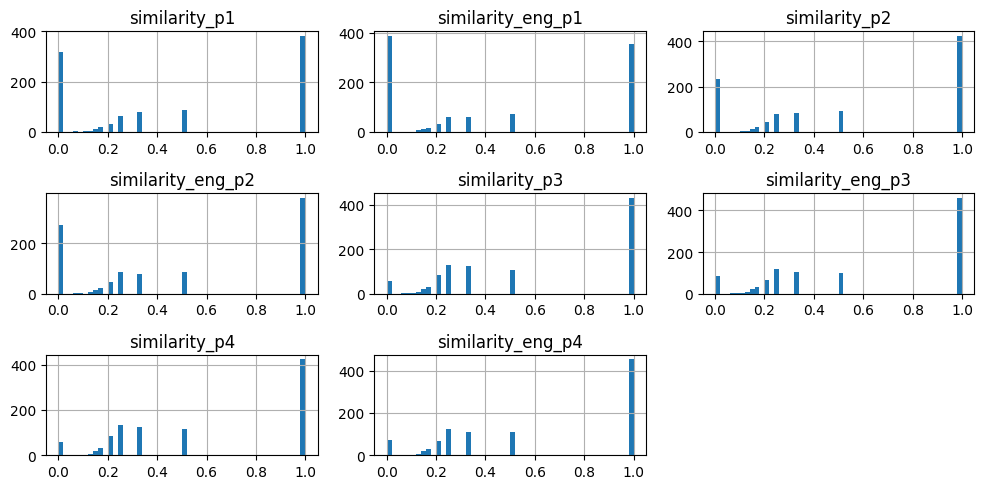

In [21]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))
plt.tight_layout()
plt.grid(True)
plt.show()


In [7]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p1'], x=dataset['similarity_p1'], name="Count of similarities in first Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p2'], x=dataset['similarity_p2'], name="Count of similarities in second Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p3'], x=dataset['similarity_p3'], name="Count of similarities in third Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p4'], x=dataset['similarity_p4'], name="Count of similarities in fourth Darija prompt"))

fig.show()


In [22]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p1'], x=dataset['similarity_eng_p1'], name="Count of similarities in first English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p2'], x=dataset['similarity_eng_p2'], name="Count of similarities in second English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p3'], x=dataset['similarity_eng_p3'], name="Count of similarities in third Englsih prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p4'], x=dataset['similarity_eng_p4'], name="Count of similarities in fourth English prompt"))

fig.show()

In [9]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p3'], x=dataset['similarity_p3'], name="Count of similarities in third Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p4'], x=dataset['similarity_p4'], name="Count of similarities in fourth Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p3'], x=dataset['similarity_eng_p3'], name="Count of similarities in third Englsih prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p4'], x=dataset['similarity_eng_p4'], name="Count of similarities in fourth English prompt"))

fig.show()

a one-sample t-test: 
used to evaluate whether a single group differs from a known value.

an independent two-sample t-test: 
whether two groups differ from each other.

a paired samples t-test: 
whether there is a significant difference in paired measurements.


#### T tests 

In [23]:
from scipy.stats import ttest_ind, ttest_rel


# Interpretation
def ind_t_test(groups, percentage1, percentage2):
    t_stat, p_value = ttest_ind(percentage1, percentage2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference between the two sets of path similarity percentages between {groups} is statistically significant.\n")
    else:
        print(f"The difference between the two sets of path similarity percentages between {groups} is not statistically significant.\n")

def paired_t_test(groups, percentage1, percentage2):
    t_stat, p_value = ttest_rel(percentage1, percentage2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference between the two sets of path similarity percentages between {groups} is statistically significant.\n")
    else:
        print(f"The difference between the two sets of path similarity percentages between {groups} is not statistically significant.\n")

groups1 = 'English and Darija in the first prompt'
groups2 = 'English and Darija in the second prompt'
groups3 = 'English and Darija in the third prompt'
groups4 = 'English and Darija in the fourth prompt'

groups5 = 'Darija first and second prompt'
groups6 = 'Darija second and third prompt'
groups7 = 'Darija third and fourth prompt'

groups8 = 'English first and second prompt'
groups9 = 'Englsih second and third prompt'
groups10 = 'English third and fourth prompt'

ind_t_test(groups1,p1_s,ep1_s)
ind_t_test(groups2,p2_s,ep2_s)
ind_t_test(groups3,p3_s,ep3_s)
ind_t_test(groups4,p4_s,ep4_s)

paired_t_test(groups5,p1_s,p2_s)
paired_t_test(groups6,p2_s,p3_s)
paired_t_test(groups7,p3_s,p4_s)
paired_t_test(groups8,ep1_s,ep2_s)
paired_t_test(groups9,ep2_s,ep3_s)
paired_t_test(groups10,ep3_s,ep4_s)

t_statistic, p_value = ttest_rel(ep3_s,ep4_s)
if p_value < 0.05:
        print(f" statistically significant.")
else:
    print(f" not statistically significant.")




T-statistic: 2.1192883805292837
P-value: 0.03418914067732537
The difference between the two sets of path similarity percentages between English and Darija in the first prompt is statistically significant.

T-statistic: 2.307863422177446
P-value: 0.02110844899040092
The difference between the two sets of path similarity percentages between English and Darija in the second prompt is statistically significant.

T-statistic: -0.7275474455518097
P-value: 0.46697590523288446
The difference between the two sets of path similarity percentages between English and Darija in the third prompt is not statistically significant.

T-statistic: -1.0332122384945353
P-value: 0.3016296297553309
The difference between the two sets of path similarity percentages between English and Darija in the fourth prompt is not statistically significant.

T-statistic: -5.732807731139105
P-value: 1.3076575756910586e-08
The difference between the two sets of path similarity percentages between Darija first and second pro

In [11]:
import numpy as np
from plotly import graph_objs as go
from scipy.stats import t

df = 1032
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f't-distribution (df={df})'))

# Add titles and labels
fig.update_layout(
    title='t-Distribution with Critical Regions',
    xaxis_title='x',
    yaxis_title='Probability Density',
    showlegend=True
)

# Show the plot
fig.show()


The third and fourth prompts have outperformed the others.

The third darija prompts has outperformed all other darija prmompts according to t test significant different and averages.

The darija ouperformed the English prompts in the first two prompts.

-------------------------------------------

Key Takeaways. A p-value is a statistical measurement used to validate a hypothesis against observed data. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

-------------------------------------------

Correlation, scatter plot and heatmap between darija third and fourth:

In [12]:
import plotly.express as px

dataset['triple_verbs'] = 'Labels:' + dataset['eng'] + ', ' + dataset['darija_ar'] + '; outputs: ' + dataset['p3_transl'] + ', ' + dataset['p4_transl']

# Create the scatter plot with custom hover data
fig = px.scatter(
    dataset,
    x='similarity_p3',
    y='similarity_p4',
    hover_name='triple_verbs',
    hover_data={
        'similarity_p3': True,
        'similarity_p4': True,
    }
)

# Customize the marker properties
fig.update_traces(
    marker=dict(size=10, opacity=0.1),
    text=dataset['eng'],
    textposition='top center'
)

# Show the plot
fig.show()

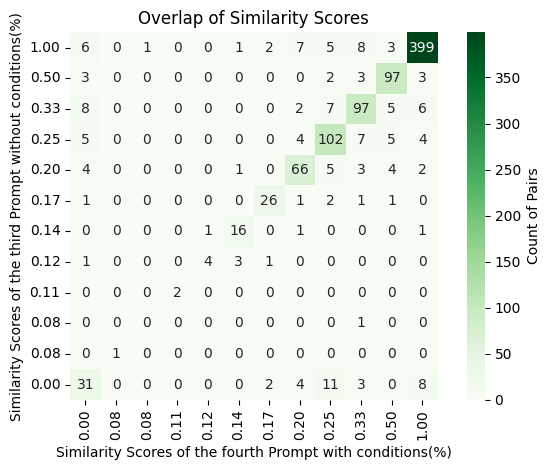

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset['triple_verbs'] = 'Labels:' + dataset['eng'] + ', ' + dataset['darija_ar'] + '; outputs: ' + dataset['p3_transl'] + ', ' + dataset['p4_transl']
dataset["index"] = dataset["triple_verbs"]
dataset.set_index("index", inplace=True)
# Create Pivot Table
piv = pd.pivot_table(dataset, values="triple_verbs", index=["similarity_p3"], columns=["similarity_p4"], aggfunc='count', fill_value=0)


# Format similarity scores to two decimal places
piv.index = piv.index.map(lambda x: f'{x:.2f}')
piv.columns = piv.columns.map(lambda x: f'{x:.2f}')


ax = sns.heatmap(piv, square=True, annot=True, fmt="d", cbar_kws={'label': 'Count of Pairs'}, cmap="Greens")
plt.xlabel('Similarity Scores of the fourth Prompt with conditions(%)')
plt.ylabel('Similarity Scores of the third Prompt without conditions(%)')
plt.title('Overlap of Similarity Scores')
plt.gca().invert_yaxis()  # Reverse y-axis
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import spearmanr, pearsonr


spearman_corr, _ = spearmanr(dataset['similarity_p3'], dataset['similarity_p4'])
print(f'Spearman correlation between Darija 3 and 4 prompts: {spearman_corr}')

pearson_corr, _ = pearsonr(dataset['similarity_p3'], dataset['similarity_p4'])
print(f'Pearson correlation between Darija  3 and 4 prompts: {pearson_corr}')

spearman_corr, _ = spearmanr(dataset['similarity_eng_p3'], dataset['similarity_eng_p4'])
print(f'Spearman correlation between English 3 and 4 prompts: {spearman_corr}')

pearson_corr, _ = pearsonr(dataset['similarity_eng_p3'], dataset['similarity_eng_p4'])
print(f'Pearson correlation between English 3 and 4 prompts: {pearson_corr}')


Spearman correlation between Darija 3 and 4 prompts: 0.8409573192872188
Pearson correlation between Darija  3 and 4 prompts: 0.8549811231352633
Spearman correlation between English 3 and 4 prompts: 0.8856862756452977
Pearson correlation between English 3 and 4 prompts: 0.8998010840949366


The english prompts have slighter better correlation.

-----------------------

Venn Diagram for lower percentages and for a difference in percentages:

In [15]:
print('filtered Darija prompt of less than 0.2 similarity')
filtered_p3 = [x for x in results_p3 if x[2] < 0.2]
print(filtered_p3)

print('filtered English prompt of less than 0.2 similarity')
filtered_p4 = [x for x in results_p4 if x[2] < 0.2]
print(filtered_p4)

filtered Darija prompt of less than 0.2 similarity
[('No.', 'eat', 0, False), ('شرح_=_explain', 'explain', 0, False), ('to_hear', 'hear', 0, False), ('to_do', 'swim', 0, False), ('Go', 'bargain', 0.16666666666666666, False), ('Wipe', 'clean', 0.16666666666666666, False), ('To_thank', 'greet', 0, False), ('دير', 'say', 0, False), ('Security', 'believe', 0, False), ('Thank.', 'thank', 0, False), ('Refuse', 'suppose', 0.16666666666666666, False), ('"before"', 'accept', 0, False), ('Hello', 'sit_down', 0, False), ('To_eat', 'send', 0, False), ('to_hear', 'listen', 0, False), ('Protect', 'ring', 0.16666666666666666, False), ('Tag', 'trust', 0.16666666666666666, False), ('Getting_married', 'marry', 0, False), ('Show_us', 'exercise', 0, False), ('Confess', 'recognize', 0.16666666666666666, False), ('Thank.', 'doubt', 0, False), ('Sleep', 'intent', 0, False), ('Okay', 'cook', 0.1111111111111111, False), ('Expect', 'predict', 0.14285714285714285, False), ('Lock_up', 'stop', 0.16666666666666666,

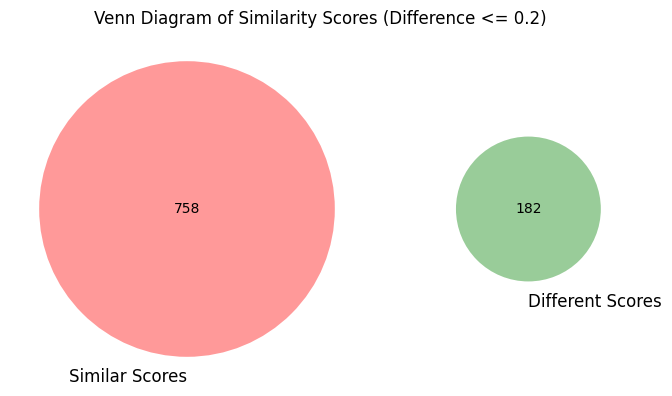

['Labels:eat, كلا; outputs: No., Refuse', 'Labels:explain, شرح; outputs: شرح = explain, كنتقل', 'Labels:touch, قاس; outputs: Measure, قياس', 'Labels:swim, عام; outputs: to do, Live', 'Labels:fatigue, عيا; outputs: Tired, Give up', 'Labels:do, دار; outputs: Do, Go', 'Labels:say, ڭال; outputs: Say, Say', 'Labels:say, قال; outputs: دير, كيفشي', 'Labels:become, ولّا; outputs: Go, To go', 'Labels:believe, أمن; outputs: Security, Secure', 'Labels:accept, قبل; outputs: "before", "before"', 'Labels:send, سيفط; outputs: To eat, To fall', 'Labels:enjoy, نشط; outputs: Activate, Active', 'Labels:encourage, شجّع; outputs: Support, Support', 'Labels:miss, زڭل; outputs: Dance, Dance', 'Labels:collect, جمع; outputs: Collect, Collect', 'Labels:reveal, فرش; outputs: Sweep, to sweep', 'Labels:marry, تجوج; outputs: Getting married, Getting married', 'Labels:introduce, قدّم; outputs: give, apply', 'Labels:exercise, ترينا; outputs: Show us, Show us', 'Labels:deny, نكر; outputs: Sleep, Sleep', 'Labels:count,

In [16]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

threshold = 0.2

# Determine sets based on the similarity difference threshold
set_prompt1 = set(dataset[(abs(dataset['similarity_p4'] - dataset['similarity_eng_p4']) <= threshold)]['eng'])
set_prompt2 = set_prompt1  # Since we're comparing the same pairs

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn2([set_prompt1, set(dataset['eng']) - set_prompt1], ('Similar Scores', 'Different Scores'))
plt.title('Venn Diagram of Similarity Scores (Difference <= 0.2)')
plt.show()

darija_arb_in_set_prompt1 = dataset[dataset['eng'].isin(set(dataset['eng']) - set_prompt1)]['triple_verbs']
darija_arb_list = darija_arb_in_set_prompt1.tolist()
print(darija_arb_list)
